## Introduction to Machine Learning - HW2 - Q4
### Professors: Abolghasemi & Arabi
#### Student: Mohamad Mahdi Samadi (810101465)

In [1]:
import numpy as np
from seaborn import heatmap
import matplotlib.pyplot as plt
from numpy.linalg import inv, det

#### Description
In a binary classification problem, two classes $ c_1 $ and $ c_2$ come from Gaussian distributions.

$ P(x | c_1) = N(\mu_1, \sigma_1) $ and $ P(x | c_2) = N(\mu_2, \sigma_2) $

The prior probabilities are $ P(c_1) = \pi_1 $ and $ P(c_2) = \pi_2 $ in which $ \pi_1 + \pi_2 = 1 $

##### `Part 1.` For each of the two calsses, calculate the discriminant function. Find a discriminant function for the classification by subtracting two functions.

For the classifier that minimizes error, $ g_i(x) $ is calculated as follows:
$$ g_i(x) = P(c_i | x) = \frac{P(x | c_i) P(c_i)}{P(x)} $$
The evidence, $ P(x) $ is unimportant as far as making a decision is concerned. It is basically just a scale factor that states how frequently we will actually measure a pattern with feature value x. By eliminating this scale factor, we obtain that:
$$ g_i(x) = P(x | c_i) P(c_i) $$
Taking a logarithm will make it easier to use in future steps:
$$ g_i(x) = \ln(P(x | c_i) P(c_i)) = \ln(P(x | c_i)) + \ln(P(c_i)) $$
$$ g_1(x) = \ln(\frac{1}{\sqrt{2\pi \sigma_1^2}}e^{-\frac{(x-\mu_1)^2}{2\sigma_1^2}}) + \ln(\pi_1) = \frac{-1}{2} \ln(2 \pi \sigma_1^2) - \frac{(x - \mu_1)^2}{2 \sigma_1^2} + \ln(\pi_1) $$
$$ g_2(x) = \ln(\frac{1}{\sqrt{2\pi \sigma_2^2}}e^{-\frac{(x-\mu_2)^2}{2\sigma_2^2}}) + \ln(\pi_2) = \frac{-1}{2} \ln(2 \pi \sigma_2^2) - \frac{(x - \mu_2)^2}{2 \sigma_2^2} + \ln(\pi_2) $$
$$ g(x) = g_1(x) - g_2(x) = \ln(\frac{\pi_1}{\pi_2}) + \ln(\frac{\sigma_2}{\sigma_1}) + \frac{(x - \mu_2)^2}{2 \sigma_2^2} - \frac{(x - \mu_1)^2}{2 \sigma_1^2}  $$



##### `Part 2.` using resulsts of the previous part, find the decision boundary.
$$ g(x) = g_1(x) - g_2(x) = 0 \rightarrow \ln(\pi_1 \sigma_2) + \frac{(x - \mu_2)^2}{2 \sigma_2^2} = \ln(\pi_2 \sigma_1) + \frac{(x - \mu_1)^2}{2 \sigma_1^2} $$
$$ g(x) = [\frac{1}{2\sigma_1^2} - \frac{1}{2\sigma_2^2}] \times x^2 + [\frac{\mu_2}{\sigma_2^2} - \frac{\mu_1}{\sigma_1^2}] \times x + [\frac{\mu_1^2}{2\sigma_1^2} - \frac{\mu_2^2}{2\sigma_2^2} + \ln(\frac{\sigma_1}{\sigma_2}) + \ln(\frac{\pi_2}{\pi_1})]  $$
$$ g(x) = ax^2 + bx + c $$
$$ a = \frac{1}{2\sigma_1^2} - \frac{1}{2\sigma_2^2} \text{ and } b = \frac{\mu_2}{\sigma_2^2} - \frac{\mu_1}{\sigma_1^2} \text{ and } c = \frac{\mu_1^2}{2\sigma_1^2} - \frac{\mu_2^2}{2\sigma_2^2} + \ln(\frac{\sigma_1}{\sigma_2}) + \ln(\frac{\pi_2}{\pi_1}) $$


##### `Part 3.` How does increasing $ \pi_1 $ or in other words decreasing $ \pi_2 $ affect on decision boundary?
As $ \pi_1 $ goes higher, our initial belief on class $ c_1 $ gets stronger. As a result, the decision boundary gets closer to the distribution with the lower prior probability (which is $ \pi_2 $) and the classifier would be more precise about class $ c_2 $. In such binary classifier model, Precision is high but recall is not as high.

##### `Part 4.` Take 100 samples from each class and plot them alongside with a decision boundary.

- $ m_i $ is the mean of class $ i $
- $ s_i $ is the standard deviation of class $ i $
- $ p_i $ is the prior probability of class $ i $
- $ c_i $ is the label of samples in class $ i $

In [2]:
m, s, p = [2, 4], [1, 1], [0.5, 0.5]

num_classes = 2
num_samples = 100

def take_samples(m, s, num_samples, num_classes):
    samples = [np.random.normal(m[i], s[i], num_samples) for i in range(num_classes)]
    c = [[i] * num_samples for i in range(num_classes)]
    return samples, c

samples, c = take_samples(m, s, num_samples, num_classes)    

In [3]:
def find_roots(m, s, p):
    a = 1 / (2 * s[0]**2) - 1 / (2 * s[1]**2)
    b = m[1] / (s[1]**2) - m[0] / (s[0]**2)
    c = m[0]**2 / (2 * s[0]**2) - m[1]**2 / (2 * s[1]**2) + np.log(s[0] / s[1]) + np.log(p[1] / p[0])

    if a == 0:
        # happens when two classes have thesame standard deviation.
        # we're dealing with a linear equation then.
        return np.array([-c / b])
    else:
        delta = b**2 - 4*a*c
        if delta > 0:
            root1 = (-b + np.sqrt(delta)) / (2 * a)
            root2 = (-b - np.sqrt(delta)) / (2 * a)
            return np.array([root1, root2])
        elif delta == 0:
            return np.array([(-b) / (2 * a)] * 2)
        else:
            return np.array([])

1 root found


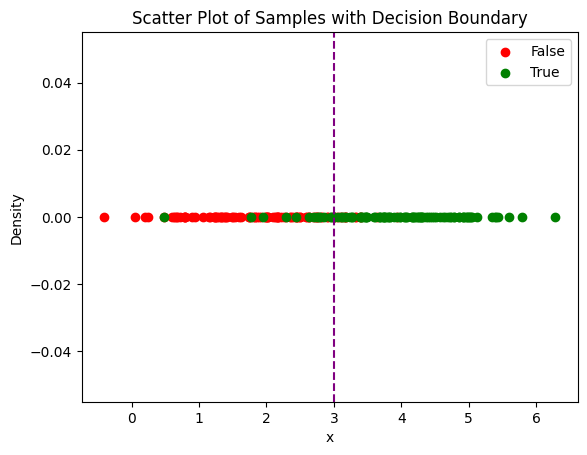

In [4]:
def plot_samples(samples, m, s, p):
    plt.scatter(samples[0], np.zeros_like(samples[0]), color='red', label='False')
    plt.scatter(samples[1], np.zeros_like(samples[1]), color='green', label='True')

    roots = find_roots(m, s, p)
    print(f"{len(roots)} root found")
    for r in roots:
        plt.axvline(x=r, color='purple', linestyle='--')

    plt.legend()
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.title('Scatter Plot of Samples with Decision Boundary')
    plt.show()

plot_samples(samples, m, s, p)

##### `Part 5.` use the decision boundary to classify samples. Also report classification metrics to analyse the classifier.
the classifier assigns a feature vector $ x $ to class $ c_i $ if $ g_i(x) > g_j(x) $ for all $ j \in {1, 2, ..., n} $ and $ j \neq i $
In our binary classification case, predicted label is 1 if $ g_2(x) > g_1(x) $

In [5]:
def discriminant_function(x, m, s, p):
    terms = [None for _ in range(3)]
    terms[0] = -0.5 * np.log(2 * np.pi * s**2)
    terms[1] = -0.5 * ((x - m)**2 / s**2)
    terms[2] = np.log(p)
    return terms[0] + terms[1] + terms[2]

def make_gx(samples, m, s, p):
    all_samples = np.concatenate(samples)
    g = [0 for _ in range(num_classes)]
    for i in range(num_classes):
        g[i] = discriminant_function(all_samples, m[i], s[i], p[i])
    gx = g[1] - g[0]    
    return gx

def make_predictions(gx):
    return gx > 0

gx = make_gx(samples, m, s, p)
preds = make_predictions(gx)

In [6]:
def analyse_preds(true, preds):
    TP, TN, FP, FN = 0, 0, 0, 0
    if len(true) != len(preds):
        print("number of predictions doesn't match number of true labels.")
        return TP, TN, FP, FN
    n = len(preds)
    for i in range(n):
        if (preds[i]) and (true[i]):
            TP += 1
        if (not preds[i]) and (not true[i]):
            TN += 1
        if (preds[i]) and (not true[i]):
            FP += 1
        if (not preds[i]) and (true[i]):
            FN += 1
    return TP, TN, FP, FN

def calculate_metrics(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return accuracy, precision, recall, f1_score

def analyse_model(c, preds):
    all_labels = np.concatenate(c)
    TP, TN, FP, FN = analyse_preds(true=all_labels, preds=preds)
    accuracy, precision, recall, f1_score = calculate_metrics(TP, TN, FP, FN)
    print("Accuracy is", accuracy)
    print("Precision is", precision)
    print("Recall is", recall)
    print("F1 score is", f1_score)

    confusion_matrix = [[TP, FP], [FN, TN]]
    heatmap(confusion_matrix, annot=True, cmap="YlOrRd")

Accuracy is 0.86
Precision is 0.86
Recall is 0.86
F1 score is 0.8599999999999999


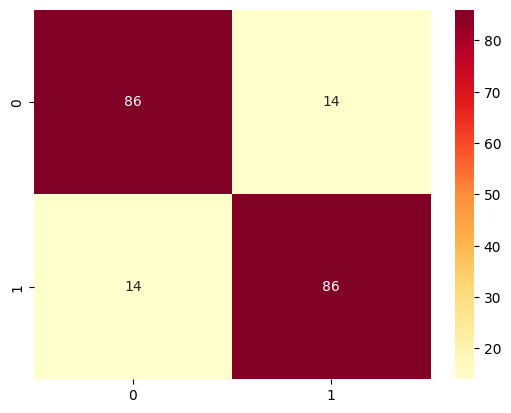

In [7]:
analyse_model(c, preds)

##### `Part 6.` calculate and plot ROC. Also report area under ROC.

In [8]:
def calc_ROC(c, gx):
    threshold = np.linspace(min(gx), max(gx), 100)
    TP_rate, FP_rate = [0 for _ in range(len(threshold))], [0 for _ in range(len(threshold))]

    for i in range(len(threshold)):
        all_labels = np.concatenate(c)
        new_preds = gx > threshold[i]
        TP, TN, FP, FN = analyse_preds(true=all_labels, preds=new_preds)
        if (TP + FN > 0):
            TP_rate[i] = (TP) / (TP + FN)
        if (FP + TN > 0):
            FP_rate[i] = (FP) / (FP + TN)

    TP_rate = np.array(TP_rate)
    FP_rate = np.array(FP_rate)
    indexes = np.argsort(FP_rate)
    TP_rate = TP_rate[indexes]
    FP_rate = FP_rate[indexes]
    return TP_rate, FP_rate

def plot_ROC(TP_rate, FP_rate):
    plt.figure()
    plt.plot(FP_rate, TP_rate, color='darkorange', lw=2, label='ROC curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

    auroc = np.trapz(TP_rate, FP_rate)
    print(f"AUROC: {auroc:.2f}")

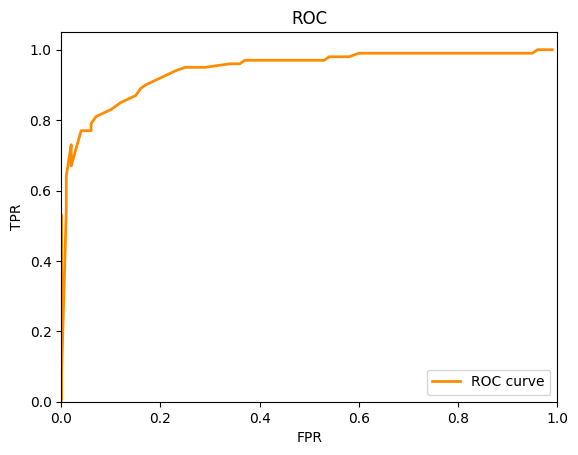

AUROC: 0.93


In [9]:
TP_rate, FP_rate = calc_ROC(c, gx)
plot_ROC(TP_rate, FP_rate)

##### `Part 7.` Repeat the stpes for a different prior probabilities. Compare the results.

In [10]:
m, s, p = [2, 4], [1, 1], [0.9, 0.1]

num_classes = 2
num_samples = 100
samples, c = take_samples(m, s, num_samples, num_classes)    

1 root found


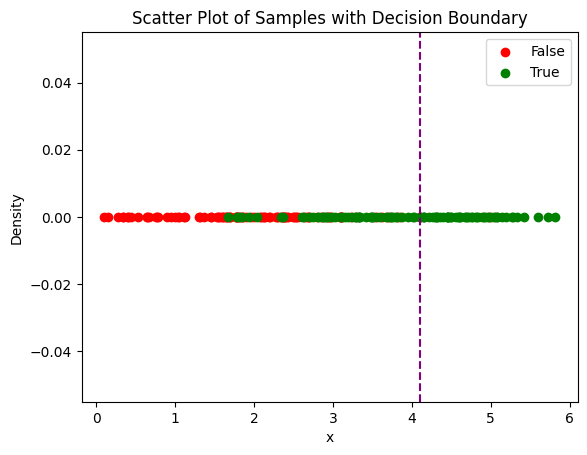

In [11]:
plot_samples(samples, m, s, p)

Accuracy is 0.745
Precision is 0.9454545454545454
Recall is 0.52
F1 score is 0.6709677419354839


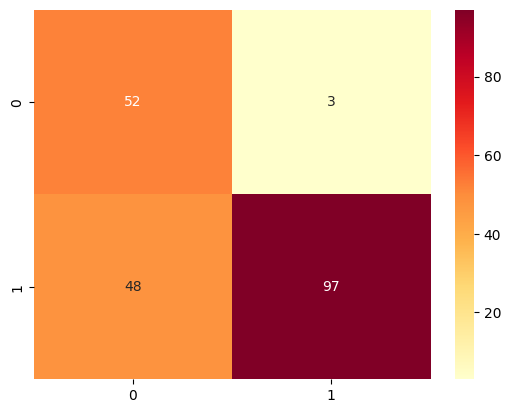

In [12]:
gx = make_gx(samples, m, s, p)
preds = make_predictions(gx)
analyse_model(c, preds)

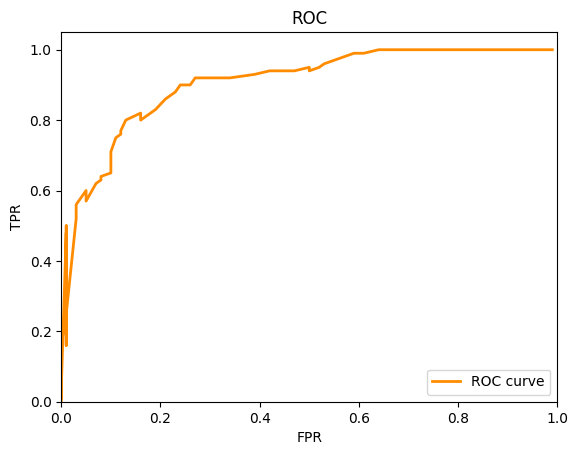

AUROC: 0.90


In [13]:
TP_rate, FP_rate = calc_ROC(c, gx)
plot_ROC(TP_rate, FP_rate)